In [ ]:
import sys
sys.executable

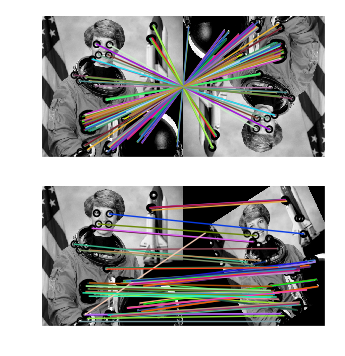

In [2]:
%matplotlib inline
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


img1 = rgb2gray(data.astronaut())
img2 = tf.rotate(img1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
img3 = tf.warp(img1, tform)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')

plt.show()

In [3]:
keypoints1

array([[ 455.       ,  346.       ],
       [ 367.       ,  399.       ],
       [ 444.       ,  310.       ],
       [ 429.       ,  370.       ],
       [ 367.2      ,  399.6      ],
       [ 454.8      ,  346.8      ],
       [ 444.       ,  310.8      ],
       [ 455.04     ,  347.04     ],
       [ 424.8      ,  355.68     ],
       [ 427.99104  ,  358.31808  ],
       [ 429.981696 ,  358.31808  ],
       [ 429.6      ,  370.8      ],
       [ 427.1616   ,  356.6592   ],
       [ 433.5648768,  361.9012608],
       [ 454.464    ,  347.328    ],
       [ 455.36256  ,  348.3648   ],
       [ 424.8      ,  356.4      ],
       [ 374.       ,  171.       ],
       [ 365.       ,  159.       ],
       [ 367.2      ,  398.88     ],
       [ 432.96768  ,  370.262016 ],
       [ 443.52     ,  311.04     ],
       [ 472.       ,  258.       ],
       [ 468.       ,  241.       ],
       [ 370.262016 ,  373.248    ],
       [ 456.855552 ,  352.346112 ],
       [ 426.816    ,  355.968    ],
 

In [4]:
descriptors1

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True, False,  True, ..., False, False, False],
       [False, False,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True, False, False]], dtype=bool)